In [3]:
import tensorflow
import tensorflow as tf
import cv2
import numpy
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import cv2
from PIL import Image
import os
import shutil
from tensorflow.keras.utils import load_img, img_to_array
from skimage.transform import resize
import numpy as np

tf.keras.utils.set_random_seed(906)
tf.config.experimental.enable_op_determinism()

In [4]:
model = tf.keras.models.load_model('model.keras')
model.compile(loss= 'binary_crossentropy',
       optimizer= tf.keras.optimizers.experimental.SGD(),
      metrics= ['accuracy'])

In [7]:
test_path= "140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test"
datagen= ImageDataGenerator(rescale= 1./255)
test_generator= datagen.flow_from_directory(
    test_path,
    target_size= (224,224),
    batch_size= 32,
    class_mode= 'binary',
    shuffle= False
)

Found 20000 images belonging to 2 classes.


In [8]:
results= model.evaluate(test_generator, verbose= 1)
print("Accuracy: {:.4}%".format(results[1]*100))
print("Loss: ", results[0])

625/625 [==============================] - 136s 183ms/step - loss: 0.0910 - accuracy: 0.9671
Accuracy: 96.71%
Loss:  0.09101886302232742


In [9]:
Y_pred = model.predict(test_generator, steps= np.ceil(test_generator.samples / test_generator.batch_size), workers = 0)

625/625 [==============================] - 113s 174ms/step


In [10]:
y_pred= np.where(Y_pred >0.5, 1, 0)
y_true= test_generator.classes

In [11]:
print(metrics.classification_report(y_true, y_pred, digits= 4))

              precision    recall  f1-score   support

           0     0.9606    0.9743    0.9674     10000
           1     0.9739    0.9600    0.9669     10000

    accuracy                         0.9671     20000
   macro avg     0.9672    0.9671    0.9671     20000
weighted avg     0.9672    0.9671    0.9671     20000



In [12]:
sklearn.metrics.f1_score(y_true, y_pred, average='weighted')

0.9671483205400168

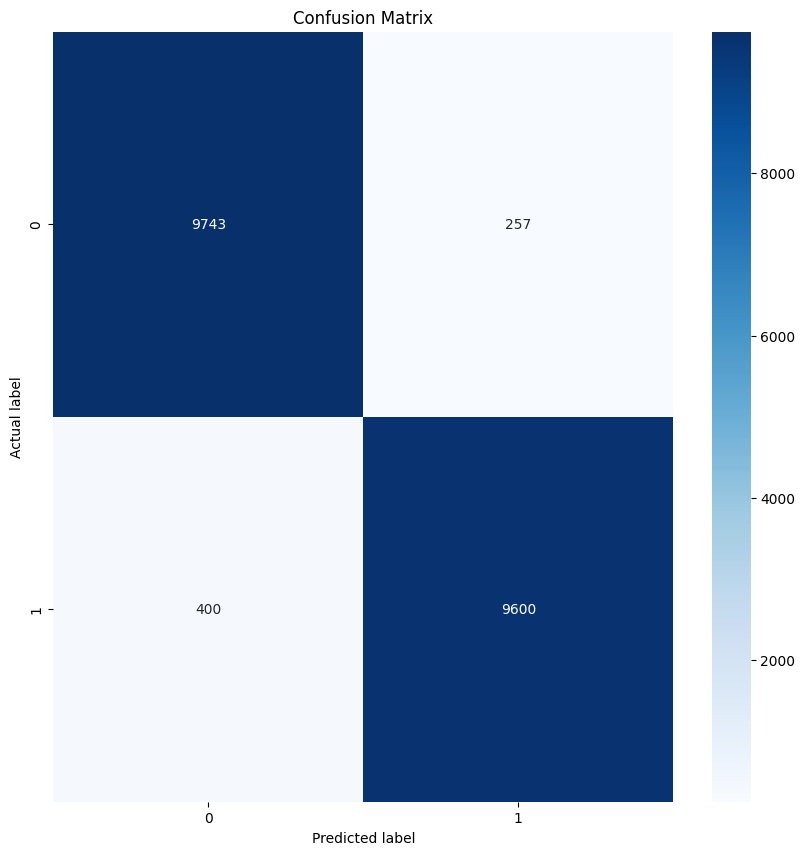

In [13]:
conf_mat= confusion_matrix(y_true, y_pred)
fig, ax= plt.subplots(figsize= (10,10))
sns.heatmap(conf_mat, annot= True, fmt= 'd', cmap= 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()